In [204]:
import pandas as pd
import numpy as np
import os
import pickle
import datetime
from datetime import date
from datetime import datetime
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement
from itertools import combinations
from itertools import permutations
from itertools import product 
import random

import matplotlib.mlab as mlab
import scipy.linalg as lng # linear algebra from scipy library
import matplotlib . pyplot as plt # library for plots
import matplotlib.animation as animation # lets animate the plots!

In [23]:
# setting saving directory
today = date.today()
now = datetime.now()
print (today)
print (now)
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S") #do not put : or similar 
print("date and time =", dt_string)	    
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs"

#saving function
def saveAsCSV(df,name,rootdir = root):
    """
    df = dataframe
    name = name for saving in format: 'thisisthename.csv'
    rootdir = local saving directory, default is root
    """
    savepath = rootdir +'/' + dt_string+'_'+ name 
    df.to_csv ( savepath, index = False, header=True)

#loading function
def loadCSV(name,rootdir = root):
    """
    rootdir = local saving directory, default is root
    name = exact name (including datetime and extention .csv)
    """
    loadpath = rootdir +'/'+ name 
    print ("loading: ",loadpath)
    df = pd.read_csv(loadpath)
    return df

2020-06-20
2020-06-20 14:30:30.821458
date and time = 20-06-2020_14-30-30


In [19]:
#unpickle 3D matrix P_t previously saved
with open('20-06-2020_14-19-49_P_t_adult1.pkl','rb') as f:
    P_t_adult1 = pickle.load(f)
    print(P_t_adult1.shape)

(144, 10, 10)


In [20]:
# nice
P_t_adult1[0]

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.2       , 0.        , 0.2       , 0.6       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [181]:
# functions

def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

def printlist(list):
    c = 0
    for element in list:
        c +=1
        print (c,element)
        
def cartesian_product(arr1, arr2): 
    return list(product(arr1, arr2))

def splitstring(word): 
    return [char for char in word]

def keep1(arrayorint):
    """
    array = array of numbers
    """
    if (type(arrayorint) != int):
        new_list =[] 
        for num in arrayorint:
            first_digit = int(str(num)[:1]) 
            new_list.append(first_digit)
        new = np.array(new_list)
    else: 
        new = int(str(arrayorint)[:1]) 
    return new

def takeFirstNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[0]
    return x

def takeSecNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[1]
    return x

In [176]:
# the statespace
states_id1 = [0,1,2,3,4,5,6,7,8,9]
states_id2 = [0,1,2,3,4,5,6,7,8,9] #10 possible unique activties 
states = ["PERSONAL CARE","EMPLOYMENT","STUDY","HOUSEHOLD AND FAMILY CARE","VOLUNTEER WORK AND MEETING","SOCIAL LIFE AND ENTERTAINMENT","SPORTS AND OUTDOOR ACTIVITIES","HOBBIES, GAMES, AND COMPUTING","MASS MEDIA","TRAVEL AND UNSPECIFIED TIME USE"]

# all possibile sequences of couples of activities
# the activity can be the same before and after so (0,0) (1,1) are acceptable combinations
transitionCodes =cartesian_product(states_id1,states_id2)
transitionCoordinates = []
transitionName = [[],[],[],[],[],[],[],[],[],[]] #ten subarrays

allchunks = chunks(transitionCodes, len(states))

counter= 0
for item in allchunks:
    #print("transitionCoordinates[%i]: %s"%(counter,item))
    transitionCoordinates.append(item)
    counter += 1
    
counter= 0
for j in range(10):
    for k in range(10):
        d = transitionCoordinates[j][k][0] # decine, left element (d,)
        u = transitionCoordinates[j][k][1] # units, right element ,u)
        tot = ('%i%i'%(d,u))
        #print (counter,tot)
        transitionName[counter].append(tot)
    counter += 1
print ((transitionName[0]))
transition_array = np.array(transitionName)

        
# Probability Matrix
transitionMatrix = P_t_adult1


['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [206]:
#print (transition_array)#class string 
#print (transition_array[0])#class string 
#print (transition_array[0][0])#class string 

#transition_array[0].ndim

In [69]:
# [time t, 0 to 143] [j state] [k state]
#transitionMatrix[1][1]
#print (type(transitionMatrix[1][1]))

<class 'numpy.ndarray'>


In [68]:
# which row, which couple, first or second? 
#print (type(transitionName[1]))

<class 'list'>


In [112]:
#activityToday = '02'
#for code in transition_array:
            #if activityToday != code:
                #print ("different from :",code)
                #continue
            #else: 
                #print (activityToday)
                #break

different from : 00
different from : 01
02


In [221]:
def activity_forecast(transitionMatrix,activityToday = 0):
    
    # Choose the starting state
    # shall this be random? 
    #activityToday = random.choice(states_id1)
    
    # Or we choose the starting state as sleep? 
    #activityToday = 0 #num int
    
    #anyhow append in the activity list
    activityList = [activityToday]
    prob = 1
    for t in range(1,144):
        for current_state in states_id1: # we look for the activiy code in the array of possible states
            if activityToday != current_state:
                continue
            else: # as soon as we 
                #index = takeFirstNumOfCode(code) #no real need for this, me dumb
                
                change = np.random.choice(transition_array[current_state],replace=True,p=transitionMatrix[t][current_state])
                for transition in transitionName[current_state]:
                    if change != transition: #type string 
                        continue
                    else:
                        next_state = takeSecNum(change)
                        prob = prob * transitionMatrix[t][current_state][next_state]
                        activityToday = next_state
                        activityList.append(next_state)
                        break
                break
   
    return activityList

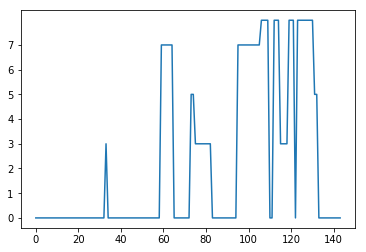

In [222]:
# SIMULATE ONE DAY
# note: at time it returns error because the sum of the row of P_t[t given] [j initial state] is not 1. 
# this shouldnt be possible. there must always be one state to move to (at least the same state!)
# how to catch why some lines at t = 0 are all zeros? 

activityList = activity_forecast(transitionMatrix,0)
T = np.arange(144)
plt.plot(T, activityList)
plt.yticks(np.arange(min(activityList), max(activityList), 1))
plt.grid(axis='activityList', linestyle='-')

In [223]:
#SIMULATE MANY DAYS
# To save every activityList
list_activity = []
count = 0

# lets simulate one year
for iterations in range(1,7):
        list_activity.append(activity_forecast(transitionMatrix,0))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == 0):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:0 and ending at state: 0'= " + str(percentage) + "%")

The probability of starting at state:0 and ending at state: 0'= 0.06%


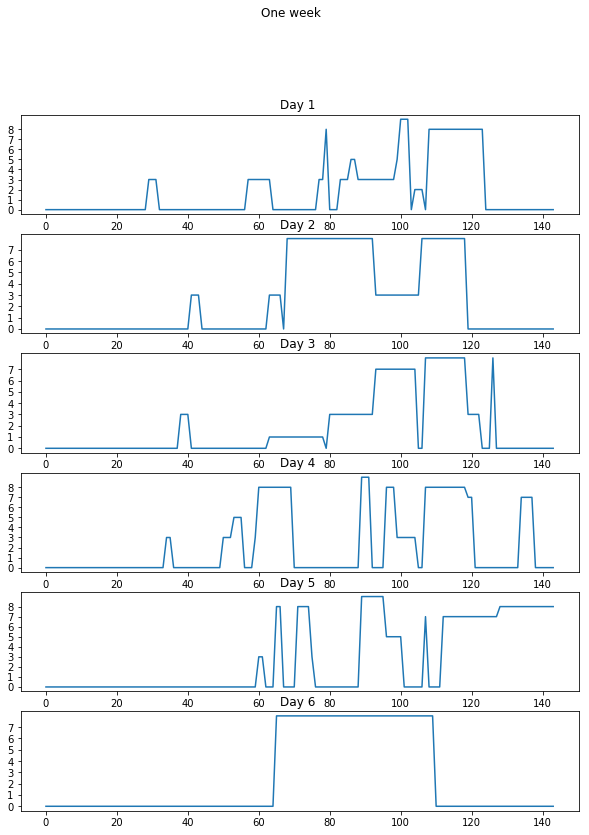

In [231]:
fig = plt.figure(figsize=(10, 15))
fig.suptitle('One week')

counter = 1
for activityList in list_activity: 
    ax =  fig.add_subplot(7,1,counter)
    ax.set_title('Day %i '%counter)
    T = np.arange(144)
    plt.plot(T, activityList)
    plt.yticks(np.arange(min(activityList), max(activityList), 1))
    plt.grid(axis='activityList', linestyle='-')
    counter +=1